In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
crime_data = pd.read_excel("/content/drive/MyDrive/data_crime.xlsx")


### Exploring data

In [3]:
# Transpose the dataset to have years as rows and types of crimes as columns
crime_data_transposed = crime_data.set_index('Type of criminal offence').transpose()

# Now, the transposed data has years as the index, which will allow for time series analysis
crime_data_transposed.head()


Type of criminal offence,"Criminal offences, total",Offences excluding road traffic offences,Road traffic offences,Offences under Penal Code (excl. traffic),"Offences against the state, public order",Offences against sexual self-determination,Sexual abuse of children,Rape,Other offences against the person (excl. traffic),Non-payment of child support etc.,...,Other property offences,Fraud,Forgery,"Off.c.common danger,off.ag.environm.(excl.traffic)",Road traffic offences under the Penal Code,Offences under the Road Traffic Act,Offences under other federal or Land laws,Offences under the Narcotics Act,Offences under the Residence Act,______________
1976,699339,388767,310572,317788,15649,6731,2316,1186,54035,10491,...,65703,25707,12443,10190,261336,49236,70979,8798,.,NaN
1977,722966,397220,325746,325214,15879,6376,2112,1190,55402,10247,...,69908,27551,12943,9891,273024,52722,72006,10266,.,NaN
1978,739044,407000,332044,335226,16475,6114,1932,1162,55517,10029,...,72997,28187,14220,9997,275667,56377,71774,10426,.,NaN
1979,718779,397866,320913,324995,16201,5836,1856,1166,54254,9451,...,71231,28074,13324,9230,264140,56773,72871,12056,.,NaN
1980,732481,403181,329300,324775,16696,5748,1790,1177,56006,9057,...,69546,27061,13144,8945,269182,60118,78406,14786,.,NaN


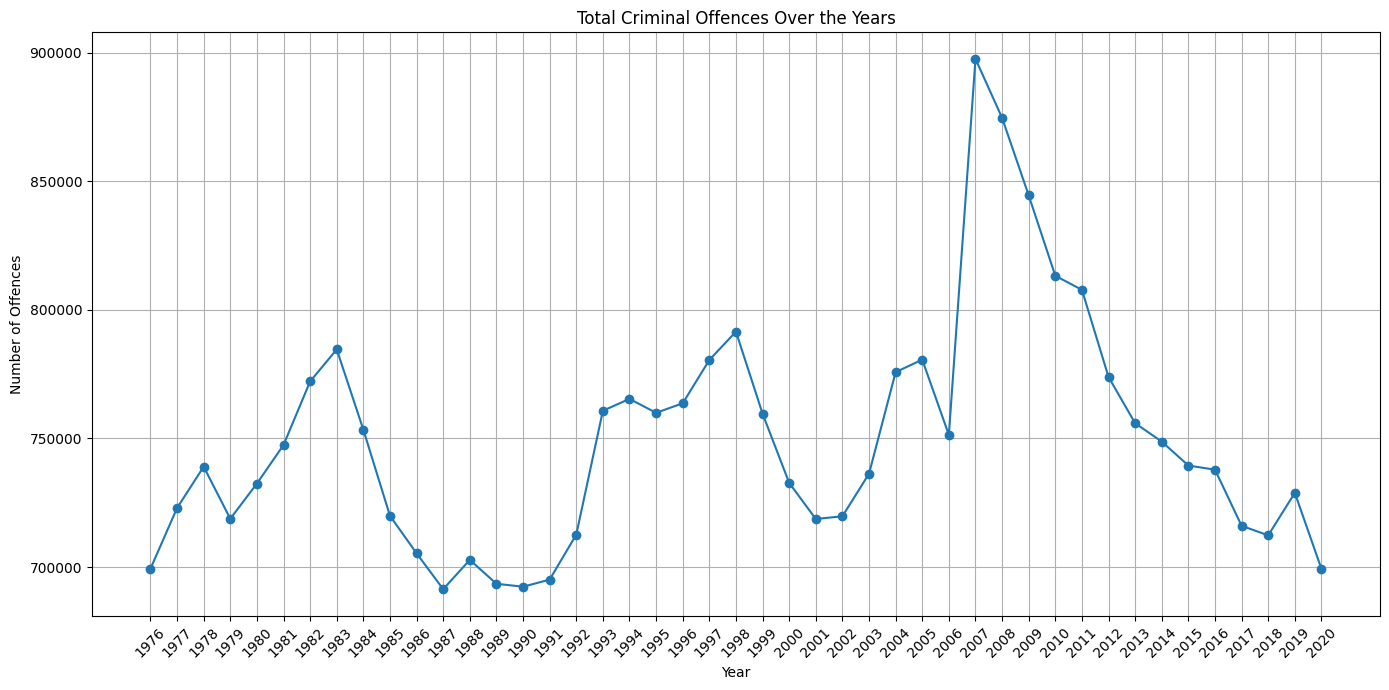

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(crime_data_transposed.index, crime_data_transposed['Criminal offences, total'], marker='o')
plt.title('Total Criminal Offences Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Offences')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


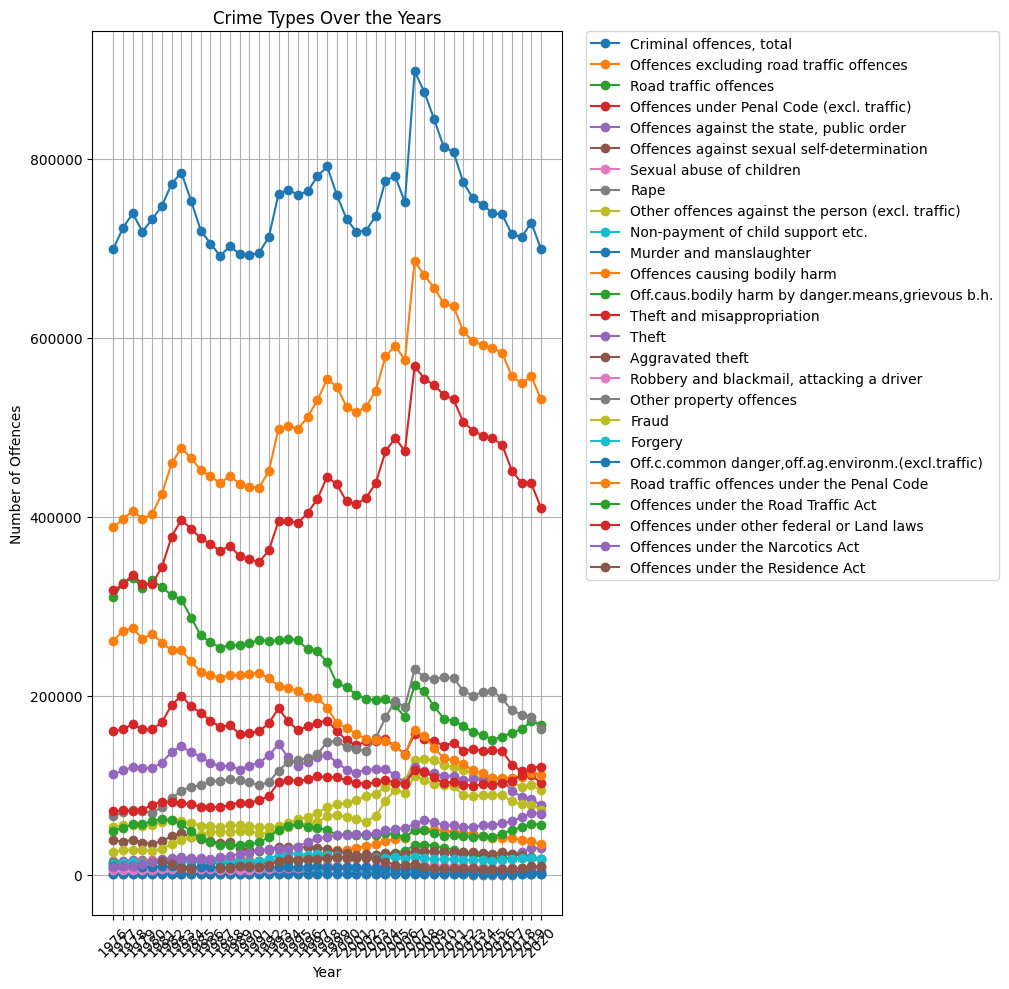

In [5]:
import numpy as np

# Replace non-numeric values with NaN
crime_data_transposed_cleaned = crime_data_transposed.apply(pd.to_numeric, errors='coerce')

# Drop columns that are entirely NaN as they do not represent valid crime data
crime_data_transposed_cleaned = crime_data_transposed_cleaned.dropna(axis=1, how='all')

# Plotting all crime types over the years after cleaning
plt.figure(figsize=(14, 10))

# Loop through each column (crime type) in the cleaned transposed data
for column in crime_data_transposed_cleaned.columns:
    plt.plot(crime_data_transposed_cleaned.index, crime_data_transposed_cleaned[column], marker='o', label=column)

plt.title('Crime Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Offences')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)  # Move the legend out of the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()


We observed that there is a sharp increase in the crime rates in 2008. That situation made us to think if it is a result of 2008 economic crisis. We wanted to see if there was a correlation between governance indicators with crime rates. We get dataset from World Bank Governance Indicators dataset (WGI) and merged the data with our crime data. After merge our dataset started by 2002.

In [6]:
governance_data = pd.read_excel("/content/drive/MyDrive/Governance_Indicators.xlsx")
governance_data

,Type of criminal offence,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Voice_Accountability,1.414031,1.413554,1.496040,1.485834,1.365231,1.336478,1.336778,1.334961,1.297783,1.349211,1.393738,1.406184,1.436359,1.422017,1.364370,1.432268,1.442795,1.353655,1.373611
1,Political_Stability_No_Violence,1.096017,0.577859,0.638884,0.888915,1.025070,0.995824,0.943831,0.859903,0.796834,0.842218,0.775621,0.927984,0.925186,0.687515,0.667541,0.574380,0.577708,0.548455,0.644988
2,Government_Effectiveness,1.660018,1.357405,1.467147,1.500525,1.645976,1.631312,1.514055,1.575109,1.515694,1.500139,1.530976,1.510988,1.665410,1.656743,1.660836,1.612810,1.523581,1.495466,1.314062
3,Regulatory_Quality,1.510943,1.501878,1.469573,1.515107,1.568909,1.616166,1.488885,1.516453,1.570686,1.548868,1.529083,1.544340,1.697039,1.711915,1.806554,1.774838,1.756327,1.714939,1.577935
4,Rule_of_Law,1.634390,1.637585,1.620204,1.652198,1.770086,1.755591,1.734026,1.648672,1.637505,1.618219,1.669232,1.642113,1.850373,1.759660,1.583853,1.573621,1.591349,1.581253,1.519799
5,Control_of_Corruption,1.888744,1.875761,1.840065,1.875442,1.793643,1.726519,1.745896,1.746210,1.766429,1.741950,1.817630,1.797944,1.812497,1.776124,1.781451,1.796618,1.898325,1.865366,1.825714
6,"Criminal offences, total",719751.000000,736297.000000,775802.000000,780659.000000,751387.000000,897631.000000,874691.000000,844520.000000,813266.000000,807815.000000,773901.000000,755938.000000,748782.000000,739487.000000,737873.000000,716044.000000,712338.000000,728868.000000,699269.000000
7,Offences excluding road traffic offences,522916.000000,541019.000000,579318.000000,591357.000000,575152.000000,685785.000000,669749.000000,656122.000000,638708.000000,635614.000000,607213.000000,596274.000000,592057.000000,588448.000000,583542.000000,557066.000000,549570.000000,557177.000000,531301.000000
8,Road traffic offences,196835.000000,195278.000000,196484.000000,189302.000000,176235.000000,211846.000000,204942.000000,188398.000000,174558.000000,172201.000000,166688.000000,159664.000000,156725.000000,151039.000000,154331.000000,158978.000000,162768.000000,171691.000000,167968.000000
9,Offences under Penal Code (excl. traffic),421202.000000,437548.000000,473267.000000,488214.000000,473515.000000,568612.000000,554329.000000,547253.000000,536393.000000,531241.000000,506308.000000,496425.000000,490747.000000,487835.000000,480647.000000,451715.000000,437932.000000,437381.000000,410153.000000


###Gov indicators

Governance indicators and crime data has very different scales. Because of that we wanted to change the scale of the data for better representation in the graph. We wanted to see the relation between total offences and governance indicators.

In [7]:
row_index = 6  # Index of the 6th row (0-based indexing)
min_value = governance_data.iloc[row_index, 1:].min()  # Exclude the first column (year)
max_value = governance_data.iloc[row_index, 1:].max()

# Apply the rescaling formula to the row
governance_data.iloc[row_index, 1:] = 1 + ((governance_data.iloc[row_index, 1:] - min_value) * 1) / (max_value - min_value)


In [8]:
governance_data

,Type of criminal offence,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Voice_Accountability,1.414031,1.413554,1.496040,1.485834,1.365231,1.336478,1.336778,1.334961,1.297783,1.349211,1.393738,1.406184,1.436359,1.422017,1.364370,1.432268,1.442795,1.353655,1.373611
1,Political_Stability_No_Violence,1.096017,0.577859,0.638884,0.888915,1.025070,0.995824,0.943831,0.859903,0.796834,0.842218,0.775621,0.927984,0.925186,0.687515,0.667541,0.574380,0.577708,0.548455,0.644988
2,Government_Effectiveness,1.660018,1.357405,1.467147,1.500525,1.645976,1.631312,1.514055,1.575109,1.515694,1.500139,1.530976,1.510988,1.665410,1.656743,1.660836,1.612810,1.523581,1.495466,1.314062
3,Regulatory_Quality,1.510943,1.501878,1.469573,1.515107,1.568909,1.616166,1.488885,1.516453,1.570686,1.548868,1.529083,1.544340,1.697039,1.711915,1.806554,1.774838,1.756327,1.714939,1.577935
4,Rule_of_Law,1.634390,1.637585,1.620204,1.652198,1.770086,1.755591,1.734026,1.648672,1.637505,1.618219,1.669232,1.642113,1.850373,1.759660,1.583853,1.573621,1.591349,1.581253,1.519799
5,Control_of_Corruption,1.888744,1.875761,1.840065,1.875442,1.793643,1.726519,1.745896,1.746210,1.766429,1.741950,1.817630,1.797944,1.812497,1.776124,1.781451,1.796618,1.898325,1.865366,1.825714
6,"Criminal offences, total",1.103256,1.186669,1.385825,1.410310,1.262742,2.000000,1.884353,1.732252,1.574692,1.547212,1.376241,1.285685,1.249609,1.202751,1.194614,1.084568,1.065885,1.149217,1.000000
7,Offences excluding road traffic offences,522916.000000,541019.000000,579318.000000,591357.000000,575152.000000,685785.000000,669749.000000,656122.000000,638708.000000,635614.000000,607213.000000,596274.000000,592057.000000,588448.000000,583542.000000,557066.000000,549570.000000,557177.000000,531301.000000
8,Road traffic offences,196835.000000,195278.000000,196484.000000,189302.000000,176235.000000,211846.000000,204942.000000,188398.000000,174558.000000,172201.000000,166688.000000,159664.000000,156725.000000,151039.000000,154331.000000,158978.000000,162768.000000,171691.000000,167968.000000
9,Offences under Penal Code (excl. traffic),421202.000000,437548.000000,473267.000000,488214.000000,473515.000000,568612.000000,554329.000000,547253.000000,536393.000000,531241.000000,506308.000000,496425.000000,490747.000000,487835.000000,480647.000000,451715.000000,437932.000000,437381.000000,410153.000000


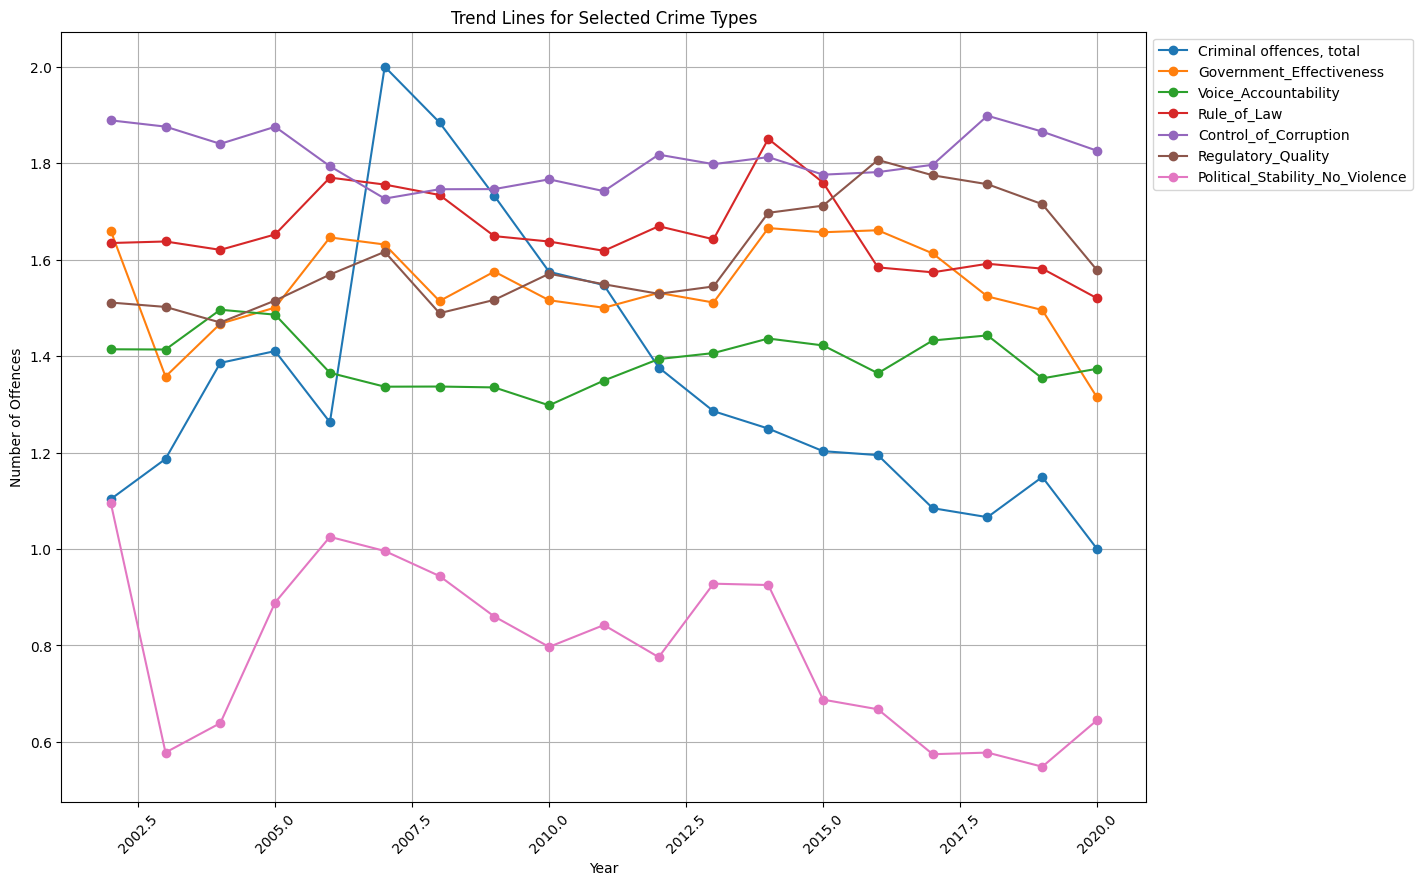

In [9]:
governance_data_transposed = governance_data.set_index('Type of criminal offence').transpose()
governance_data_transposed_cleaned = governance_data_transposed.apply(pd.to_numeric, errors='coerce')
governance_data_cleaned = governance_data_transposed_cleaned.apply(pd.to_numeric, errors='coerce').fillna(crime_data_transposed_cleaned.mean())

In [32]:
# Clean the dataset by replacing '.' with NaN and then impute these with the mean of the column
crime_data_cleaned = crime_data_transposed_cleaned.apply(pd.to_numeric, errors='coerce').fillna(crime_data_transposed_cleaned.mean())


In [20]:
crime_data_cleaned.head()

Type of criminal offence,"Criminal offences, total",Offences excluding road traffic offences,Road traffic offences,Offences under Penal Code (excl. traffic),"Offences against the state, public order",Offences against sexual self-determination,Sexual abuse of children,Rape,Other offences against the person (excl. traffic),Non-payment of child support etc.,...,"Robbery and blackmail, attacking a driver",Other property offences,Fraud,Forgery,"Off.c.common danger,off.ag.environm.(excl.traffic)",Road traffic offences under the Penal Code,Offences under the Road Traffic Act,Offences under other federal or Land laws,Offences under the Narcotics Act,Offences under the Residence Act
1976,699339,388767,310572,317788,15649,6731,2316,1186.0,54035,10491.0,...,5099,65703,25707,12443,10190,261336,49236,70979,8798,11812.552632
1977,722966,397220,325746,325214,15879,6376,2112,1190.0,55402,10247.0,...,5196,69908,27551,12943,9891,273024,52722,72006,10266,11812.552632
1978,739044,407000,332044,335226,16475,6114,1932,1162.0,55517,10029.0,...,5535,72997,28187,14220,9997,275667,56377,71774,10426,11812.552632
1979,718779,397866,320913,324995,16201,5836,1856,1166.0,54254,9451.0,...,5560,71231,28074,13324,9230,264140,56773,72871,12056,11812.552632
1980,732481,403181,329300,324775,16696,5748,1790,1177.0,56006,9057.0,...,5294,69546,27061,13144,8945,269182,60118,78406,14786,11812.552632


In [21]:
crime_data_cleaned.columns


Index(['Criminal offences, total', 'Offences excluding road traffic offences',
       'Road traffic offences', 'Offences under Penal Code (excl. traffic)',
       'Offences against the state, public order',
       'Offences against sexual self-determination',
       'Sexual abuse of children', 'Rape',
       'Other offences against the person (excl. traffic)',
       'Non-payment of child support etc.', 'Murder and manslaughter',
       'Offences causing bodily harm',
       'Off.caus.bodily harm by danger.means,grievous b.h.',
       'Theft and misappropriation', 'Theft', 'Aggravated theft',
       'Robbery and blackmail, attacking a driver', 'Other property offences',
       'Fraud', 'Forgery',
       'Off.c.common danger,off.ag.environm.(excl.traffic)',
       'Road traffic offences under the Penal Code',
       'Offences under the Road Traffic Act',
       'Offences under other federal or Land laws',
       'Offences under the Narcotics Act', 'Offences under the Residence Act'],
  

### Aggregated crime data
For better categorization, I aggregate related crimes to a bigger category

In [97]:
agg_crime_data = pd.DataFrame()
agg_crime_data["Total"] = crime_data_cleaned["Criminal offences, total"]
agg_crime_data["Sexual"] = crime_data_cleaned["Sexual abuse of children"] + crime_data_cleaned["Rape"] + crime_data_cleaned["Offences against sexual self-determination"]
agg_crime_data["Property/Financial"] = crime_data_cleaned["Forgery"] + crime_data_cleaned["Fraud"] + crime_data_cleaned["Theft"] + crime_data_cleaned["Aggravated theft"] + crime_data_cleaned["Robbery and blackmail, attacking a driver"] + crime_data_cleaned["Other property offences"] + crime_data_cleaned["Theft and misappropriation"] + crime_data_cleaned["Non-payment of child support etc."]
agg_crime_data["Violent"] = crime_data_cleaned["Offences causing bodily harm"] + crime_data_cleaned["Off.caus.bodily harm by danger.means,grievous b.h."] + crime_data_cleaned["Murder and manslaughter"]
agg_crime_data["Traffic"] = crime_data_cleaned["Offences under the Road Traffic Act"] + crime_data_cleaned["Road traffic offences under the Penal Code"] + crime_data_cleaned["Road traffic offences"]
agg_crime_data["Narcotics"] = crime_data_cleaned["Offences under the Narcotics Act"]
agg_crime_data["Public order/Against state"] = crime_data_cleaned["Offences against the state, public order"]

In [75]:
agg_crime_data.columns

Index(['Total', 'Sexual', 'Property/Financial', 'Violent', 'Traffic',
       'Narcotics', 'Public order/Against state'],
      dtype='object')

In [98]:
agg_crime_data = agg_crime_data.rename_axis("year")
agg_crime_data

,Total,Sexual,Property/Financial,Violent,Traffic,Narcotics,Public order/Against state
year,,,,,,,
1976,699339,10233.000000,431283.000000,26882,621144,8798,15649
1977,722966,9678.000000,442191.000000,27716,651492,10266,15879
1978,739044,9208.000000,459765.000000,28121,664088,10426,16475
1979,718779,8858.000000,445258.000000,28329,641826,12056,16201
1980,732481,8715.000000,441393.000000,29658,658600,14786,16696
1981,747463,8585.000000,467406.000000,31878,643228,17054,17828
1982,772194,8578.000000,522806.000000,33297,625010,17105,19101
1983,784657,8770.000000,555694.000000,33240,615128,17802,19635
1984,753397,8645.000000,537777.000000,32113,575216,18274,19239


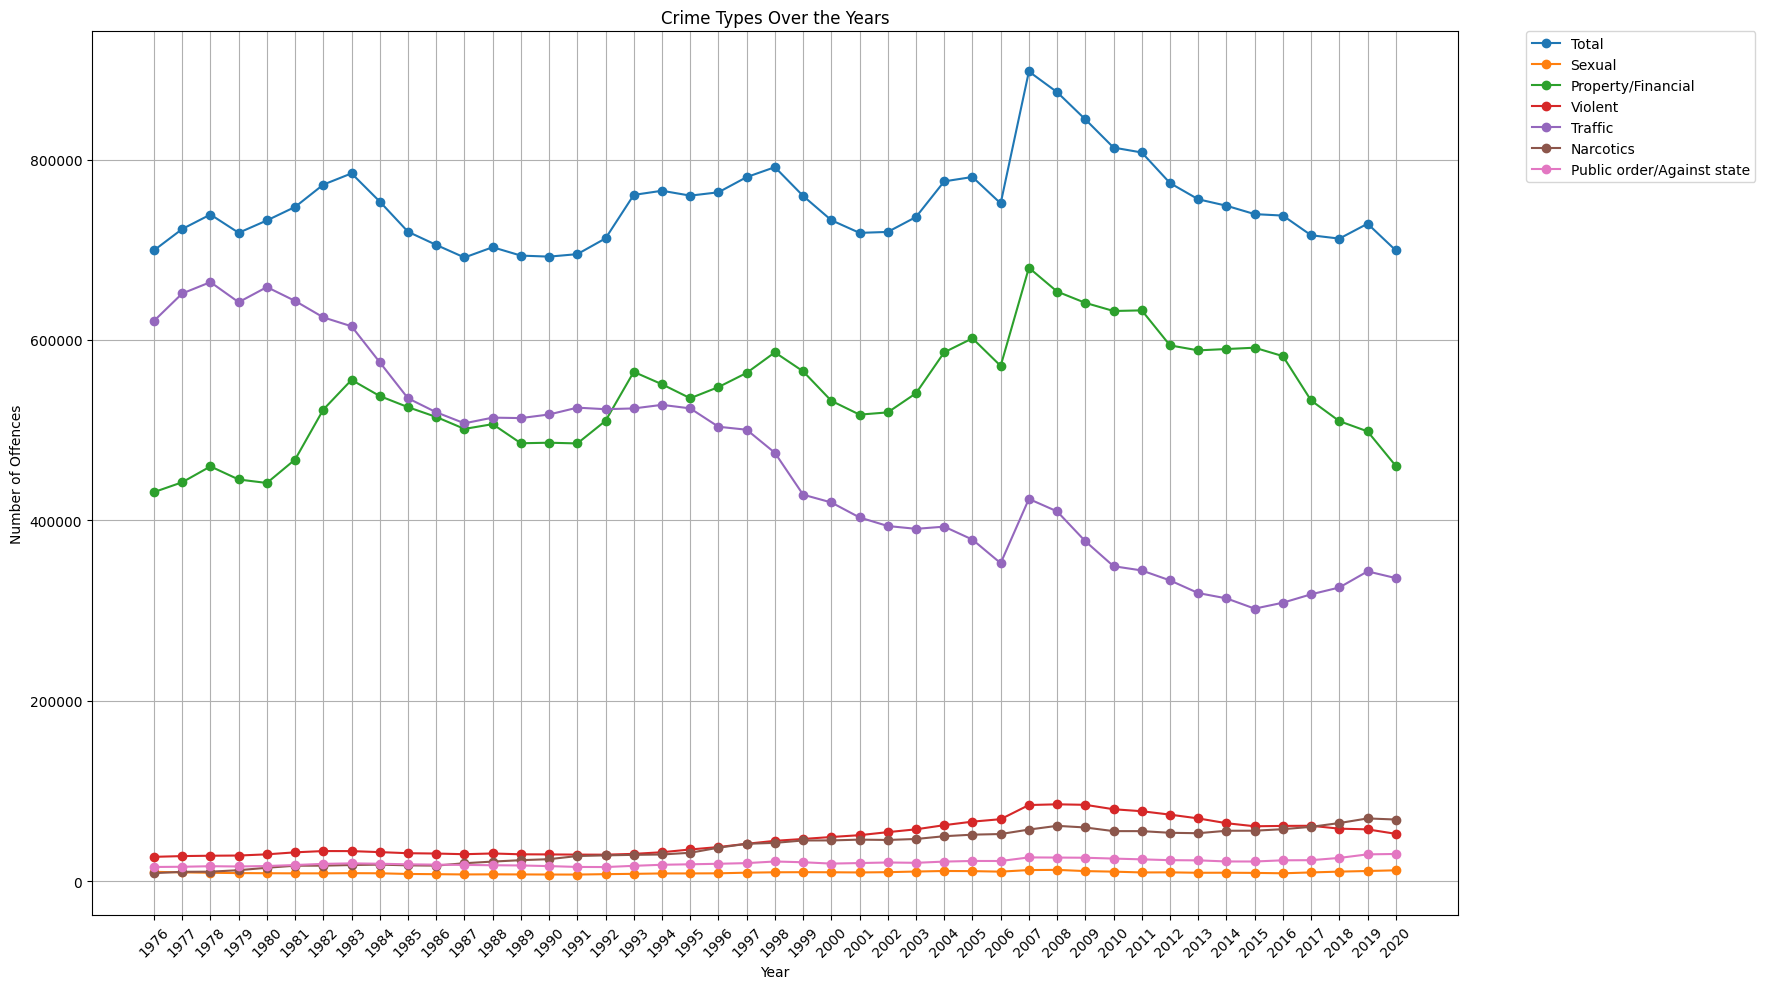

In [25]:
plt.figure(figsize=(24, 10))
# Loop through each column (crime type) in the cleaned transposed data
for column in agg_crime_data.columns:
    plt.plot(agg_crime_data.index, agg_crime_data[column], marker='o', label=column)

plt.title('Crime Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Offences')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)  # Move the legend out of the plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()


### Incorporating World Bank Data
This dataset has various data on the economical and social indicators of Germany. We'll select GDP growth, unemployment (female/male), education involvement, migration

In [26]:
DE_WorldBank_data = pd.read_excel("/content/drive/MyDrive/economical_DE.xls", skiprows = 3)

In [27]:
columns_to_drop = ['Indicator Code','Country Name',	'Country Code', '1960', '1961', '1962', '1963', '1964','1965',
                   '1966','1967','1968','1969','1970', '1971', '1972', '1973','1974','1975','2021', '2022']

# Use the drop method to remove the specified columns
DE_WorldBank_data = DE_WorldBank_data.drop(columns=columns_to_drop)


In [28]:
DE_WorldBank_data = DE_WorldBank_data.set_index('Indicator Name').transpose()

In [29]:
econ_data = pd.DataFrame()

#Economic indicators
econ_data["GDP % growth"] = DE_WorldBank_data['GDP per capita growth (annual %)']
econ_data["inflation"] = DE_WorldBank_data['Inflation, consumer prices (annual %)']

#Migration
econ_data["migration"] = DE_WorldBank_data['Net migration']
econ_data["population_total"] = DE_WorldBank_data["Population, total"]
econ_data["pop_rural"] = DE_WorldBank_data["Rural population growth (annual %)"]
econ_data["pop_urban"] = DE_WorldBank_data["Urban population (% of total population)"]
#econ_data["highEdu_expends"] = DE_WorldBank_data["Expenditure on tertiary education (% of government expenditure on education)"]

#Unemployment (had NaN values for 70s and 80s)
"""
econ_data["unemp_total"] = DE_WorldBank_data["Unemployment, total (% of total labor force) (modeled ILO estimate)"]
econ_data["unemp_advEdu"] = DE_WorldBank_data["Unemployment with advanced education (% of total labor force with advanced education)"]
econ_data["unemp_totalYouth"] = DE_WorldBank_data["Unemployment, youth total (% of total labor force ages 15-24) (national estimate)"]
econ_data["unemp_intEdu_Female"] = DE_WorldBank_data["Unemployment with advanced education, female (% of female labor force with advanced education)"]
econ_data["unemp_basicEdu"] = DE_WorldBank_data["Unemployment with basic education (% of total labor force with basic education)"]
econ_data["noEdu_youth"] = DE_WorldBank_data["Share of youth not in education, employment or training, total (% of youth population)"]
"""


econ_data = econ_data.rename_axis("year")
econ_data

,GDP % growth,inflation,migration,population_total,pop_rural,pop_urban
year,,,,,,
1976,5.400212,4.246631,25585.0,78336950.0,-0.636708,72.617
1977,3.581437,3.734162,-919.0,78159814.0,-0.434751,72.674
1978,3.098182,2.718697,-15269.0,78091820.0,-0.292177,72.730
1979,4.104331,4.043620,-18647.0,78126350.0,-0.165029,72.787
1980,1.198694,5.441058,-9445.0,78288576.0,-0.002248,72.844
1981,0.376243,6.344243,10722.0,78407907.0,-0.383074,72.989
1982,-0.300058,5.241045,42143.0,78333366.0,-0.532931,73.107
1983,1.839034,3.293415,85198.0,78128282.0,-0.247279,73.103
1984,3.178987,2.405793,142722.0,77858685.0,0.247431,72.943


### Correlation matrix for World Bank Data and the Crime Types

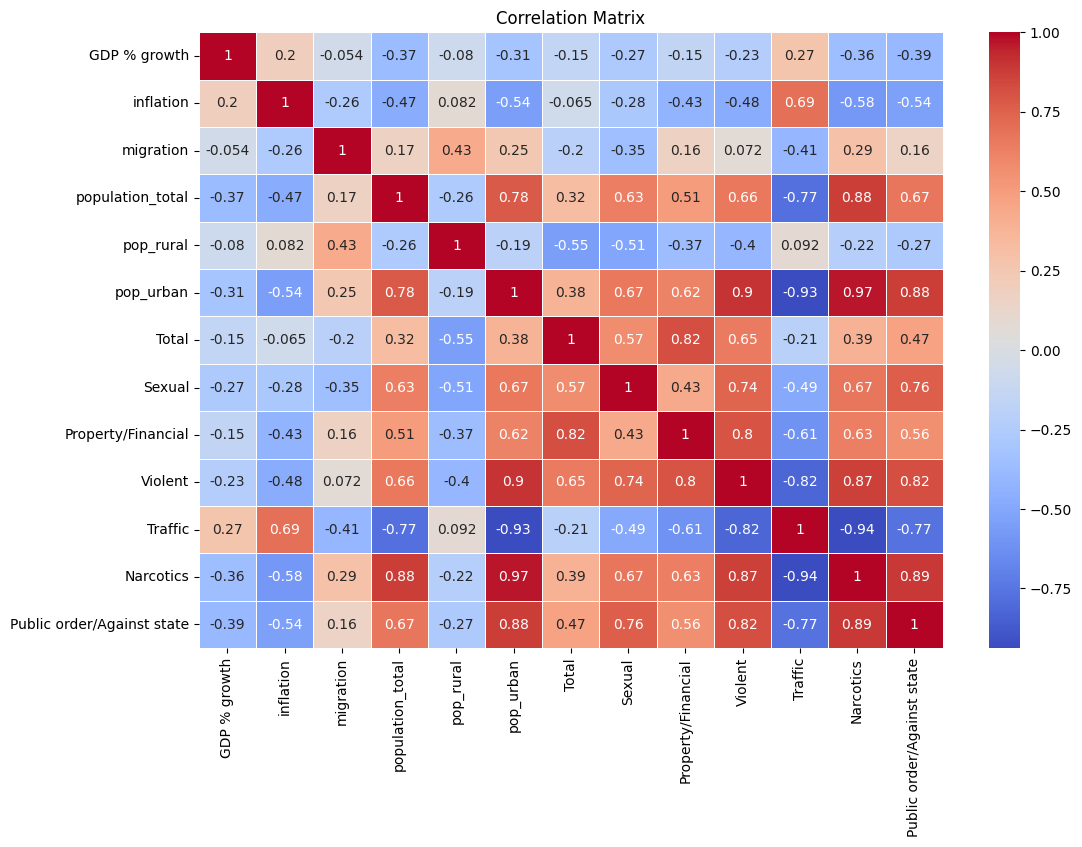

In [31]:
merged_df = pd.merge(econ_data, agg_crime_data, on='year')
correlation_matrix = merged_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Correlation Matrix between Governance indicators and crime types

In [108]:
governance_data_cleaned


Type of criminal offence,Voice_Accountability,Political_Stability_No_Violence,Government_Effectiveness,Regulatory_Quality,Rule_of_Law,Control_of_Corruption,"Criminal offences, total",Offences excluding road traffic offences,Road traffic offences,Offences under Penal Code (excl. traffic),...,"Robbery and blackmail, attacking a driver",Other property offences,Fraud,Forgery,"Off.c.common danger,off.ag.environm.(excl.traffic)",Road traffic offences under the Penal Code,Offences under the Road Traffic Act,Offences under other federal or Land laws,Offences under the Narcotics Act,Offences under the Residence Act
2002,1.414031,1.096017,1.660018,1.510943,1.634390,1.888744,1.103256,522916.0,196835.0,421202.0,...,9535.0,138320.0,59376.0,18400.0,8622.0,152310.0,44525.0,101714.0,45598.0,18840.0
2003,1.413554,0.577859,1.357405,1.501878,1.637585,1.875761,1.186669,541019.0,195278.0,437548.0,...,9514.0,152493.0,65810.0,18557.0,7903.0,150593.0,44685.0,103471.0,46676.0,18124.0
2004,1.496040,0.638884,1.467147,1.469573,1.620204,1.840065,1.385825,579318.0,196484.0,473267.0,...,10187.0,176003.0,82722.0,19462.0,7547.0,149781.0,46703.0,106051.0,49739.0,14886.0
2005,1.485834,0.888915,1.500525,1.515107,1.652198,1.875442,1.410310,591357.0,189302.0,488214.0,...,9843.0,194028.0,95191.0,19499.0,6750.0,143987.0,45315.0,103143.0,51472.0,11499.0
2006,1.365231,1.025070,1.645976,1.568909,1.770086,1.793643,1.262742,575152.0,176235.0,473515.0,...,9760.0,187832.0,91448.0,17915.0,6123.0,134190.0,42045.0,101637.0,52165.0,11172.0
2007,1.336478,0.995824,1.631312,1.616166,1.755591,1.726519,2.000000,685785.0,211846.0,568612.0,...,11303.0,229720.0,110727.0,20296.0,6528.0,161890.0,49956.0,117173.0,57116.0,12717.0
2008,1.336778,0.943831,1.514055,1.488885,1.734026,1.745896,1.884353,669749.0,204942.0,554329.0,...,10840.0,220757.0,105552.0,18790.0,6062.0,155061.0,49881.0,115420.0,61256.0,9384.0
2009,1.334961,0.859903,1.575109,1.516453,1.648672,1.746210,1.732252,656122.0,188398.0,547253.0,...,10547.0,219378.0,101618.0,17739.0,5679.0,141816.0,46582.0,108869.0,59432.0,7917.0
2010,1.297783,0.796834,1.515694,1.570686,1.637505,1.766429,1.574692,638708.0,174558.0,536393.0,...,10407.0,220706.0,100693.0,17420.0,5184.0,130709.0,43849.0,102315.0,55391.0,7206.0
2011,1.349211,0.842218,1.500139,1.548868,1.618219,1.741950,1.547212,635614.0,172201.0,531241.0,...,10183.0,220117.0,99042.0,17540.0,4787.0,128029.0,44172.0,104373.0,55391.0,7546.0


In [110]:
agg_gov_data = pd.DataFrame()
agg_gov_data['Political Stability'] = governance_data_cleaned['Political_Stability_No_Violence']
agg_gov_data["Total"] = governance_data_cleaned["Criminal offences, total"]
agg_gov_data["Sexual"] = governance_data_cleaned["Sexual abuse of children"] + governance_data_cleaned["Rape"] + governance_data_cleaned["Offences against sexual self-determination"]
agg_gov_data["Property/Financial"] = governance_data_cleaned["Forgery"] + governance_data_cleaned["Fraud"] + governance_data_cleaned["Theft"] + governance_data_cleaned["Aggravated theft"] + governance_data_cleaned["Robbery and blackmail, attacking a driver"] + governance_data_cleaned["Other property offences"] + governance_data_cleaned["Theft and misappropriation"] + governance_data_cleaned["Non-payment of child support etc."]
agg_gov_data["Violent"] = governance_data_cleaned["Offences causing bodily harm"] + governance_data_cleaned["Off.caus.bodily harm by danger.means,grievous b.h."] + governance_data_cleaned["Murder and manslaughter"]
agg_gov_data["Traffic"] = governance_data_cleaned["Offences under the Road Traffic Act"] + governance_data_cleaned["Road traffic offences under the Penal Code"] + governance_data_cleaned["Road traffic offences"]
agg_gov_data["Narcotics"] = governance_data_cleaned["Offences under the Narcotics Act"]
agg_gov_data["Public order/Against state"] = governance_data_cleaned["Offences against the state, public order"]

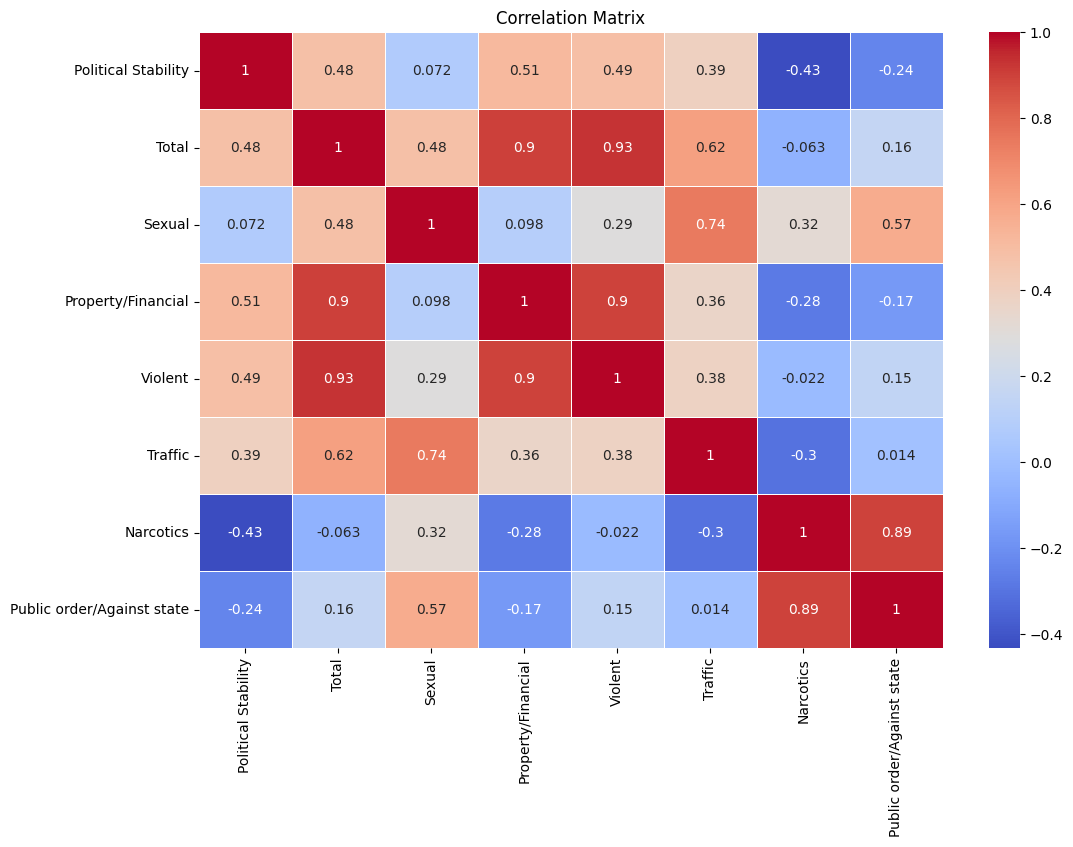

In [111]:
correlation_matrix = agg_gov_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()